# Project 1: SAT & ACT Analysis

## Problem Statement

In March 2016, a new format for the SAT was released. Scores have been historically low in Utah, and the State wants to know where to spend their money to best increase participation rates for the SAT.

## Executive Summary
The data I examined for analysis were the scores and participation data for the 2017 and 2018 ACT and SAT standardized tests. I first took a look at the data to get a feel for it and see if there were any obvious issues. There were a few incorrect datatypes and incorrect values I had to fix. I also renamed the columns so they were more intuitive and easier to work with. After cleaning the data, I combined the 4 diferent tables into a single table. Next, I did some exploratory data analysis. I examined the descriptive statistics and sorted the data to find high or low participation rates. I ended up creating a new column to show the change in participation from 2017 to 2018 and found a few states with very large increases. This provided some direction for where I would do further research later. I then visualized the data by making several different types of plots. One of the most useful was the Chloropleth map showing the participation rates for each state on the map of the US. Finally, I did some outside research on a few states, including, but not limitted to, the states with large increases in participation. I found that large increases were due to contracts the state made with the company administering the test allowing the state to offer the test for free and mandate it to juniors. This is the case for most of the states with very high participation rates. From this I was able to draw some conclusions on how to increase participation rates in Utah.

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat17 = pd.read_csv('../data/sat_2017.csv') #Reading the 2017 SAT score data
act17 = pd.read_csv('../data/act_2017.csv') #Reading the 2017 ACT score data

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat17.head(10) #Printing the first few rows to get a feel for the SAT data

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act17.head(10) #Printing the first few rows to get a feel for the ACT data

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

The SAT is a standardized test made up of two major sections: Evidence-Based Reading and Writing and Math. Possible scores for each section are between 200 and 800, with a possible total score between 400 and 1600. The SAT 2017 data set contains the breakdown of scores, including the total, as well as the participation rate by state. 

The ACT is a standardized test made up of four major sections: English, Math, Reading, and Science. Possible scores for each section are between 1 and 36, and the composite score is the arithmetic mean of all sections. The ACT 2017 data set contains the breakdown of scores, including the composite, as well as the participation rate by state.

#### 4a. Does the data look complete? 

With the exception of some incorrect values, the data looks complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

The minimum possible value for the SAT is 200 on each section with a composite score of 400. The maximum possible value for the SAT is a 1600. The minimum possible value for the ACT is a 1 and the maximum value is a 36. 

In [5]:
sat17.min()

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

After examining the SAT data, I found that the minimum math score was a 52. This is impossible, so this is an error. After cross referencing this with the actual data found here: https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/, I noticed that the score should be 524, so I change the value below.

In [6]:
sat17.loc[20, ['Math']] = 524

After examining the ACT data, I found that one of the composite values at index 51 was '20.2x'. This is a string, so I imagine this is causing the column to be falsely interpreted as a string datatype. Below, I change the value to the the appropriate string, and later I will cast these column values to floats. 

In [7]:
act17.loc[51, 'Composite'] = str(20.2)

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
sat17.dtypes #Checking the data types of each feature

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [9]:
act17.dtypes #Checking the data types of each feature

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

The composite column from the ACT data should not be an object, but rather a float. In addition, the participation rate for both data sets should be floats instead of objects.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
#to_numeric is a function that maps given data to floats
def to_numeric(data):
    data = data.map(lambda x: float(x))
    return data

- Fix any individual values preventing other columns from being the appropriate type.

In [11]:
sat17['Participation'] = sat17['Participation'].str.replace('%', '') #Removing the percent symbols in order to cast values to floats
act17['Participation'] = act17['Participation'].str.replace('%', '')

This was adapted from https://stackoverflow.com/questions/33413249/how-to-remove-string-value-from-column-in-pandas-dataframe

- Finish your data modifications by making sure the columns are now typed appropriately.

In [12]:
sat17['Participation'] = to_numeric(sat17['Participation']) #Using the to_numeric function to cast values to floats
act17['Participation'] = to_numeric(act17['Participation'])
act17['Composite'] = to_numeric(act17['Composite'])

- Display the data types again to confirm they are correct.

In [13]:
sat17.dtypes #Making sure datatypes are correct

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [14]:
act17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
#Creating dictionaries to change the names of the columns to make them more descriptive and easier to work with
sat17_col_names = {
    'State': 'state',
    'Participation': 'sat17_participation',
    'Evidence-Based Reading and Writing': 'sat17_reading_and_writing',
    'Math': 'sat17_math',
    'Total': 'sat17_composite'
}

act17_col_names = {
    'State': 'state',
    'Participation': 'act17_participation',
    'English': 'act17_english',
    'Math': 'act17_math',
    'Reading': 'act17_reading',
    'Science': 'act17_science',
    'Composite': 'act17_composite'
}

In [16]:
sat17 = sat17.rename(columns=sat17_col_names) #Using the new column dictionaries to rename the columns
act17 = act17.rename(columns=act17_col_names)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|2017/18 SAT/ACT|State in the United States where test was taken|
|sat17_participation|float|2017 SAT|Percent of high school seniors to take the SAT in 2017|
|sat17_reading_and_writing|int|2017 SAT|Average score out of 800 for the reading and writing section of the 2017 SAT|
|sat17_math|int|2017 SAT|Average score out of 800 for the math section of the 2017 SAT|
|sat17_composite|int|2017 SAT|Score out of 1600 for the combined score of the 2017 SAT (including math and reading and writing)|
|act17_participation|float|2017 ACT|Percent of high school seniors to take the ACT in 2017|
|act17_english|float|2017 ACT|Average score out of 36 for the english section of the 2017 ACT|
|act17_math|float|2017 ACT|Average score out of 36 for the math section of the 2017 ACT|
|act17_reading|float|2017 ACT|Average score out of 36 for the reading section of the 2017 ACT|
|act17_science|float|2017 ACT|Average score out of 36 for the science section of the 2017 ACT|
|act17_composite|float|2017 ACT|Score out of 36 (calculated by taking the arithmetic mean on all four sections of the 2017 ACT)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [17]:
act17 = act17.drop([0]) #the ACT 2017 data has an extra observation for national, so I remove this

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
scores_2017 = sat17.merge(act17, on='state') #Joining the SAT 2017 and ACT 2017 dataframes on state

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [19]:
scores_2017.to_csv('../data/combined_2017.csv', index=False) #Saving the combined dataframe to a new csv

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [20]:
sat18 = pd.read_csv('../data/sat_2018.csv') #Reading the SAT 2018 data
act18 = pd.read_csv('../data/act_2018.csv') #Reading the ACT 2018 data

In [21]:
sat18.head() #Examining the first few rows to get a feel for the data

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [22]:
act18.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


The ACT 2018 data is incomplete and only contains the composite scores.

In [23]:
sat18.dtypes #Checking the datatypes to see if they make sense

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [24]:
act18.dtypes

State             object
Participation     object
Composite        float64
dtype: object

### Data Dictionary 2018
|Feature|Type|Dataset|Description|
|---|---|---|---|
|sat18_participation|float|2018 SAT|Percent of high school seniors to take the SAT in 2018|
|sat18_reading_and_writing|int|2018 SAT|Average score out of 800 for the reading and writing section of the 2018 SAT|
|sat18_math|int|2018 SAT|Average score out of 800 for the math section of the 2018 SAT|
|sat18_composite|int|2018 SAT|Score out of 1600 for the combined score of the 2018 SAT (including math and reading and writing)|
|act18_participation|float|2018 ACT|Percent of high school seniors to take the ACT in 2018|
|act18_composite|float|2018 ACT|Score out of 36 (calculated by taking the arithmetic mean on all four sections of the 2018 ACT)|

Similar to the 2017 data sets, the participation columns are being read as a string, so the same process of removing the percent symbols and using the function to_numeric to cast the values to floats must be implemented. I do this below.

In [25]:
sat18['Participation'] = sat18['Participation'].str.replace('%', '')
act18['Participation'] = act18['Participation'].str.replace('%', '')

In [26]:
sat18['Participation'] = to_numeric(sat18['Participation'])
act18['Participation'] = to_numeric(act18['Participation'])

After checking the nuber of observations, I noticed that act18 had an additional observation. I looked at the head and tail to check for any odd observations like the act17 had with the national row. Then, I looked for duplicate rows and found that there were two rows for Maine. Below, I remove the duplicate rows.

In [27]:
act18 = act18.drop_duplicates()

In [28]:
#Creating a dictionary with new column names
sat18_col_names = {
    'State': 'state',
    'Participation': 'sat18_participation',
    'Evidence-Based Reading and Writing': 'sat18_reading_and_writing',
    'Math': 'sat18_math',
    'Total': 'sat18_composite'
}

act18_col_names = {
    'State': 'state',
    'Participation': 'act18_participation',
    'Composite': 'act18_composite'
}

In [29]:
sat18 = sat18.rename(columns=sat18_col_names) #Replacing the column names with the new column names
act18 = act18.rename(columns=act18_col_names)

In [30]:
scores_2018 = sat18.merge(act18, on='state') #Joining the SAT 2018 and ACT 2018 dataframes on state

In [31]:
scores_2018.to_csv('../data/combined_2018.csv', index=False) #Saving the 2018 scores to a csv

In [32]:
scores = scores_2017.merge(scores_2018, on='state') #Joining the 2017 Scores and 2018 Scores dataframes on state

In [33]:
scores.head() #Examining the first few rows of the final dataframe

,state,sat17_participation,sat17_reading_and_writing,sat17_math,sat17_composite,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation,sat18_reading_and_writing,sat18_math,sat18_composite,act18_participation,act18_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [34]:
scores.to_csv('../data/final.csv', index=False) #Saving the final combined dataframe to a csv

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [35]:
scores.describe()

,sat17_participation,sat17_reading_and_writing,sat17_math,sat17_composite,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation,sat18_reading_and_writing,sat18_math,sat18_composite,act18_participation,act18_composite
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,38.600000,570.860000,558.660000,1129.620000,65.920000,20.862000,21.13600,21.956000,20.992000,21.466000,44.820000,565.020000,557.760000,1122.880000,62.320000,21.454000
std,34.560211,44.385146,45.839832,89.913085,32.110676,2.324307,1.97399,2.046317,3.195139,2.004241,37.097604,47.010416,46.987432,92.845634,34.114118,2.111312
min,2.000000,503.000000,492.000000,996.000000,8.000000,16.300000,18.00000,18.100000,2.300000,17.800000,2.000000,480.000000,486.000000,998.000000,7.000000,17.700000
25%,4.000000,535.250000,524.000000,1057.000000,31.000000,19.000000,19.40000,20.425000,19.900000,19.800000,4.250000,535.000000,524.250000,1062.250000,27.750000,19.925000
50%,34.000000,559.500000,549.500000,1107.500000,71.000000,20.550000,20.90000,21.700000,21.100000,21.400000,50.000000,552.000000,545.500000,1098.500000,66.000000,21.050000
75%,65.000000,613.500000,601.000000,1214.000000,100.000000,23.100000,23.00000,23.875000,22.275000,23.400000,74.500000,612.750000,594.250000,1207.000000,100.000000,23.650000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.30000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [36]:
#stand_dev is a function that takes in data and returns the standard deviation
def stand_dev(data):
    st_dev = (1/len(data)*(sum((data-data.mean())**2)))**0.5
    return st_dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [37]:
#Using the stand_dev function to create a dictionary with each column as the key and the standard deviation as the corresponding value
column_std = {column: stand_dev(scores[column]) for column in scores.columns[1:]}
column_std

{'sat17_participation': 34.21286307808804,
 'sat17_reading_and_writing': 43.93905324423821,
 'sat17_math': 45.37911854586864,
 'sat17_composite': 89.00941298536914,
 'act17_participation': 31.787947401491657,
 'act17_english': 2.3009467616613812,
 'act17_math': 1.9541504548012678,
 'act17_reading': 2.025750231395766,
 'act17_science': 3.1630263988781375,
 'act17_composite': 1.9840977798485642,
 'sat18_participation': 36.72475459414263,
 'sat18_reading_and_writing': 46.537937212558106,
 'sat18_math': 46.51518461749884,
 'sat18_composite': 91.91248881408882,
 'act18_participation': 33.771254048376704,
 'act18_composite': 2.090091864009809}

In [38]:
column_std_np = {column: np.std(scores[column]) for column in scores.columns[1:]}     #Same thing as above except with numpy's std method
column_std_np

{'sat17_participation': 34.21286307808804,
 'sat17_reading_and_writing': 43.9390532442382,
 'sat17_math': 45.37911854586864,
 'sat17_composite': 89.00941298536914,
 'act17_participation': 31.787947401491657,
 'act17_english': 2.3009467616613812,
 'act17_math': 1.9541504548012678,
 'act17_reading': 2.025750231395766,
 'act17_science': 3.1630263988781375,
 'act17_composite': 1.9840977798485642,
 'sat18_participation': 36.72475459414263,
 'sat18_reading_and_writing': 46.537937212558106,
 'sat18_math': 46.51518461749884,
 'sat18_composite': 91.91248881408882,
 'act18_participation': 33.7712540483767,
 'act18_composite': 2.090091864009809}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

The manually calculated standard deviations match up with the output from numpy's std method, but not from pandas' describe method. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## Participation Rates
### SAT 2017

In [39]:
scores.sort_values('sat17_participation', ascending=False).loc[:, ['state', 'sat17_participation']].head()

,state,sat17_participation
21,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
28,New Hampshire,96.0
18,Maine,95.0


In [40]:
scores.sort_values('sat17_participation').loc[:, ['state', 'sat17_participation']].head()

,state,sat17_participation
33,North Dakota,2.0
23,Mississippi,2.0
14,Iowa,2.0
24,Missouri,3.0
43,Utah,3.0


It seems that the states with the highest participation rates for the 2017 SAT are found in the Northeast, and the states with the lowest are found in the midwest. I wonder if certain regions promote one test over the other.
### ACT 2017

In [41]:
scores.sort_values('act17_participation', ascending=False).loc[:, ['state', 'act17_participation']].head()

,state,act17_participation
0,Alabama,100.0
16,Kentucky,100.0
48,Wisconsin,100.0
43,Utah,100.0
41,Tennessee,100.0


In [42]:
scores.sort_values('act17_participation').loc[:, ['state', 'act17_participation']].head()

,state,act17_participation
18,Maine,8.0
7,Delaware,18.0
28,New Hampshire,18.0
38,Rhode Island,21.0
37,Pennsylvania,23.0


It seems the ACT 2017 is pretty close to opposite that of the SAT 2017 participation rates. The highest rates are generally found in the midwest and the lowest rates are generally found in the northeast. I am getting a hunch that certain regions, such as these, focus solely on one test. I wonder if these regions with high participation rates for only one test have higher scores. I hypothesize that they would.
### SAT 2018

In [43]:
scores.sort_values('sat18_participation', ascending=False).loc[:, ['state', 'sat18_participation']].head()

,state,sat18_participation
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
21,Michigan,100.0
11,Idaho,100.0


In [44]:
scores.sort_values('sat18_participation').loc[:, ['state', 'sat18_participation']].head()

,state,sat18_participation
33,North Dakota,2.0
49,Wyoming,3.0
40,South Dakota,3.0
26,Nebraska,3.0
48,Wisconsin,3.0


The SAT 2018 participation rates follow a similar trend to that of the SAT 2017 with the exception of a couple western states with 100% participation rates: Colorado and Idaho. I wonder why this is, and if other western states are following this trend of increasing participation rates. Maybe the SAT is becoming more popular in the west.

In [45]:
scores.loc[(scores['state'] == 'Idaho') | (scores['state'] == 'Colorado'), ['state', 'sat17_participation', 'sat18_participation', 'act17_participation', 'act18_participation']]

,state,sat17_participation,sat18_participation,act17_participation,act18_participation
5,Colorado,11.0,100.0,100.0,30.0
11,Idaho,93.0,100.0,38.0,36.0


Colorado had a 89% increase in participation for the SAT, but had a 70% decrease in participation for the ACT. I'll have to research this to see what happened. I also should make a new column for percent increase.

### ACT 2018

In [46]:
scores.sort_values('act18_participation', ascending=False).loc[:, ['state', 'act18_participation']].head()

,state,act18_participation
0,Alabama,100.0
16,Kentucky,100.0
48,Wisconsin,100.0
43,Utah,100.0
41,Tennessee,100.0


In [47]:
scores.sort_values('act18_participation').loc[:, ['state', 'act18_participation']].head()

,state,act18_participation
18,Maine,7.0
38,Rhode Island,15.0
28,New Hampshire,16.0
7,Delaware,17.0
37,Pennsylvania,20.0


This seems to follow very closely the pattern of the ACT 2017 participation rates.
## Increase in Participation Rates

In [48]:
scores['sat_participation_increase'] = scores['sat18_participation'] - scores['sat17_participation']
scores['act_participation_increase'] = scores['act18_participation'] - scores['act17_participation']

### SAT Participation Increase

In [49]:
scores.sort_values('sat_participation_increase', ascending = False).loc[:, ['state', 'sat17_participation', 'sat18_participation', 'sat_participation_increase']].head(3)

,state,sat17_participation,sat18_participation,sat_participation_increase
12,Illinois,9.0,99.0,90.0
5,Colorado,11.0,100.0,89.0
38,Rhode Island,71.0,97.0,26.0


Illinoise and Colorado are two states to further research with very high increase in participation rates.
### ACT Participation Increase

In [50]:
scores.sort_values('act_participation_increase', ascending = False).loc[:, ['state', 'act_participation_increase']].head(2)

,state,act_participation_increase
34,Ohio,25.0
26,Nebraska,16.0


Ohio and Nebraska are two states to further research with the highest increases in participation rates.

## Composite Scores
### SAT 2017 & 2018

In [51]:
scores.sort_values('sat17_composite', ascending=False).loc[:, ['state', 'sat17_composite']].head()

,state,sat17_composite
22,Minnesota,1295
48,Wisconsin,1291
14,Iowa,1275
24,Missouri,1271
15,Kansas,1260


In [52]:
scores.sort_values('sat17_composite').loc[:, ['state', 'sat17_composite']].head()

,state,sat17_composite
7,Delaware,996
11,Idaho,1005
21,Michigan,1005
18,Maine,1012
8,Florida,1017


In [53]:
scores.sort_values('sat18_composite', ascending=False).loc[:, ['state', 'sat18_composite']].head()

,state,sat18_composite
22,Minnesota,1298
48,Wisconsin,1294
33,North Dakota,1283
14,Iowa,1265
15,Kansas,1265


In [54]:
scores.sort_values('sat18_composite').loc[:, ['state', 'sat18_composite']].head()

,state,sat18_composite
7,Delaware,998
47,West Virginia,999
11,Idaho,1001
43,Utah,1010
10,Hawaii,1010


This is really interesting. States that had the highest participation rates for the SAT such as Delaware, Idaho, and Maine have some of the lowest scores, and states that had the lowest participation rates such as Iowa and Wisconsin have some of the highest scores. This is true for both 2017 and 2018.
### ACT 2017 & 2018

In [55]:
scores.sort_values('act17_composite', ascending=False).loc[:, ['state', 'act17_composite']].head()

,state,act17_composite
28,New Hampshire,25.5
20,Massachusetts,25.4
6,Connecticut,25.2
18,Maine,24.3
31,New York,24.2


In [56]:
scores.sort_values('act17_composite').loc[:, ['state', 'act17_composite']].head()

,state,act17_composite
27,Nevada,17.8
23,Mississippi,18.6
39,South Carolina,18.7
10,Hawaii,19.0
32,North Carolina,19.1


In [57]:
scores.sort_values('act18_composite', ascending=False).loc[:, ['state', 'act18_composite']].head()

,state,act18_composite
6,Connecticut,25.6
20,Massachusetts,25.5
28,New Hampshire,25.1
31,New York,24.5
21,Michigan,24.2


In [58]:
scores.sort_values('act18_composite').loc[:, ['state', 'act18_composite']].head()

,state,act18_composite
27,Nevada,17.7
39,South Carolina,18.3
23,Mississippi,18.6
10,Hawaii,18.9
0,Alabama,19.1


It seems a similar pattern occurs for the ACT. States with the highest participation rates seem to have lower scores, and states with the lowest participation rates seem to have higher scores. Are we focusing too much on pushing people to take the test rather than preparing them for it? Does high participation in both tests affect this (as opposed to high participation in one test and low participation in the other)?
## 100% Participation and Composite Scores
### SAT 2017

In [59]:
scores.loc[scores['sat17_participation'] == 100, ['state', 'sat17_participation', 'sat17_composite', 'sat18_composite']]

,state,sat17_participation,sat17_composite,sat18_composite
6,Connecticut,100.0,1041,1053
7,Delaware,100.0,996,998
21,Michigan,100.0,1005,1011


States with 100% participation on the SAT 2017 did have slightly increased scores in 2018, but not by a lot.
### SAT 2018

In [60]:
scores.loc[scores['sat18_participation'] == 100, ['state', 'sat18_participation', 'sat17_composite', 'sat18_composite']]

,state,sat18_participation,sat17_composite,sat18_composite
5,Colorado,100.0,1201,1025
6,Connecticut,100.0,1041,1053
7,Delaware,100.0,996,998
11,Idaho,100.0,1005,1001
21,Michigan,100.0,1005,1011


States with 100% participation on the SAT 2018 do generally have slightly higher scores than in 2017, but not by a lot, and half of them also had 100% participation in 2017 as well. 
### ACT 2017 & 2018

In [61]:
scores.loc[scores['act17_participation'] == 100, ['state', 'act17_participation', 'act17_composite', 'act18_composite']]

,state,act17_participation,act17_composite,act18_composite
0,Alabama,100.0,19.2,19.1
3,Arkansas,100.0,19.4,19.4
5,Colorado,100.0,20.8,23.9
16,Kentucky,100.0,20.0,20.2
17,Louisiana,100.0,19.5,19.2
22,Minnesota,100.0,21.5,21.3
23,Mississippi,100.0,18.6,18.6
24,Missouri,100.0,20.4,20.0
25,Montana,100.0,20.3,20.0
27,Nevada,100.0,17.8,17.7


In [62]:
scores.loc[scores['act18_participation'] == 100, ['state', 'act18_participation', 'act17_composite', 'act18_composite']]

,state,act18_participation,act17_composite,act18_composite
0,Alabama,100.0,19.2,19.1
3,Arkansas,100.0,19.4,19.4
16,Kentucky,100.0,20.0,20.2
17,Louisiana,100.0,19.5,19.2
23,Mississippi,100.0,18.6,18.6
24,Missouri,100.0,20.4,20.0
25,Montana,100.0,20.3,20.0
26,Nebraska,100.0,21.4,20.1
27,Nevada,100.0,17.8,17.7
32,North Carolina,100.0,19.1,19.1


There does not seem to be any significant change between years for states with 100% participation on the ACT.
## Participation on Both Tests
### 2017

In [63]:
scores.loc[(scores['sat17_participation'] > 50) & (scores['act17_participation'] > 50), ['state', 'sat17_participation', 'act17_participation', 'sat17_composite', 'act17_composite', 'sat18_composite', 'act18_composite']]

,state,sat17_participation,act17_participation,sat17_composite,act17_composite,sat18_composite,act18_composite
8,Florida,83.0,73.0,1017,19.8,1099,19.9
9,Georgia,61.0,55.0,1050,21.4,1064,21.4
10,Hawaii,55.0,90.0,1085,19.0,1010,18.9


Only three states have over 50% participation on both tests in 2017.
### 2018

In [64]:
scores.loc[(scores['sat18_participation'] > 50) & (scores['act18_participation'] > 50), ['state', 'sat18_participation', 'act18_participation', 'sat17_composite', 'act17_composite', 'sat18_composite', 'act18_composite']]

,state,sat18_participation,act18_participation,sat17_composite,act17_composite,sat18_composite,act18_composite
8,Florida,56.0,66.0,1017,19.8,1099,19.9
9,Georgia,70.0,53.0,1050,21.4,1064,21.4
10,Hawaii,56.0,89.0,1085,19.0,1010,18.9
32,North Carolina,52.0,100.0,1081,19.1,1098,19.1
39,South Carolina,55.0,100.0,1064,18.7,1070,18.3


An additional two states have over 50% participation on both tests in 2018: North and South Dakota.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

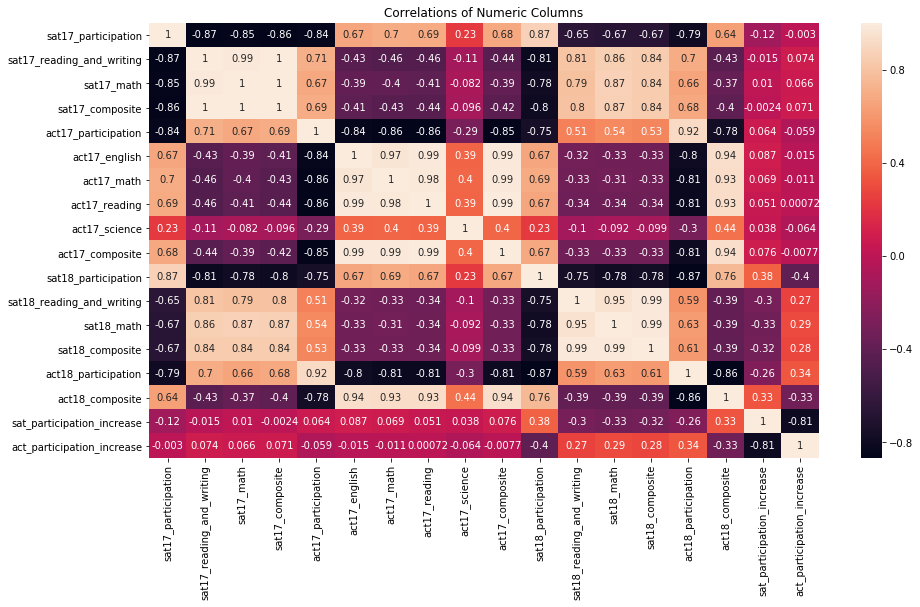

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.set_title('Correlations of Numeric Columns')
ax = sns.heatmap(scores.corr(), annot=True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [66]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (20, 10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = 'Green') # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontweight = 'bold') # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i]) 

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

### Participation Rate Distributions

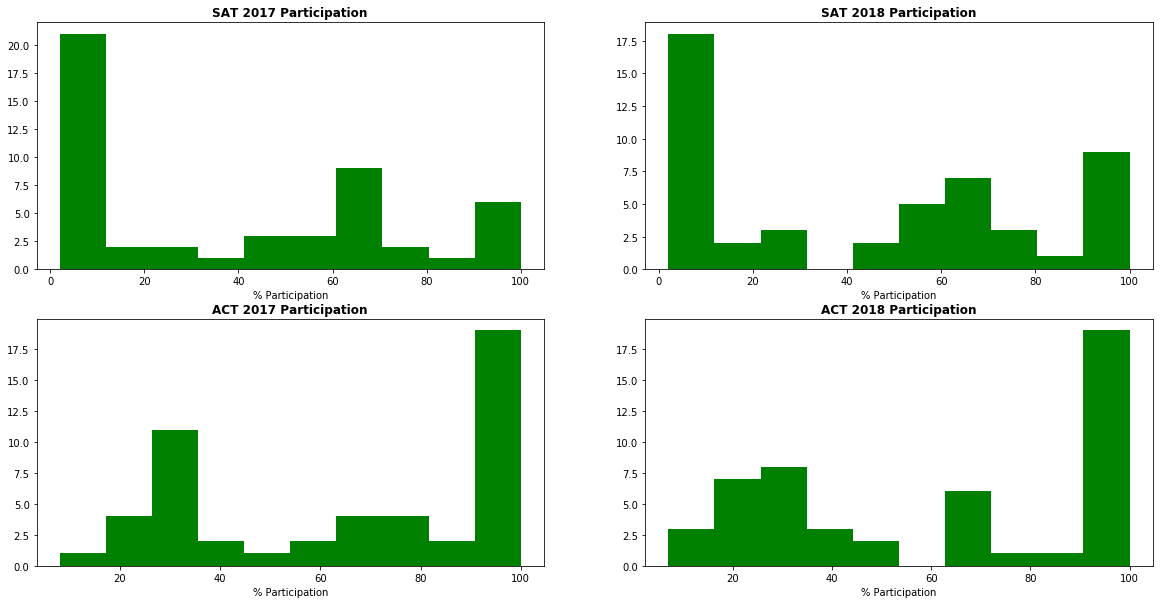

In [67]:
participation_columns = ['sat17_participation', 'sat18_participation', 'act17_participation', 'act18_participation']
participation_titles = ['SAT 2017 Participation', 'SAT 2018 Participation', 'ACT 2017 Participation', 'ACT 2018 Participation']
participation_xlabels = ['% Participation' for i in range(4)]

subplot_histograms(scores, participation_columns, participation_titles, participation_xlabels)

Two observations:
1. The distributions of participation rates for each test are similar for both years.
2. There are a lot more states with higher participation rates for the ACT and a lot more states with lower participation rates for the SAT.

### Math Score Distributions

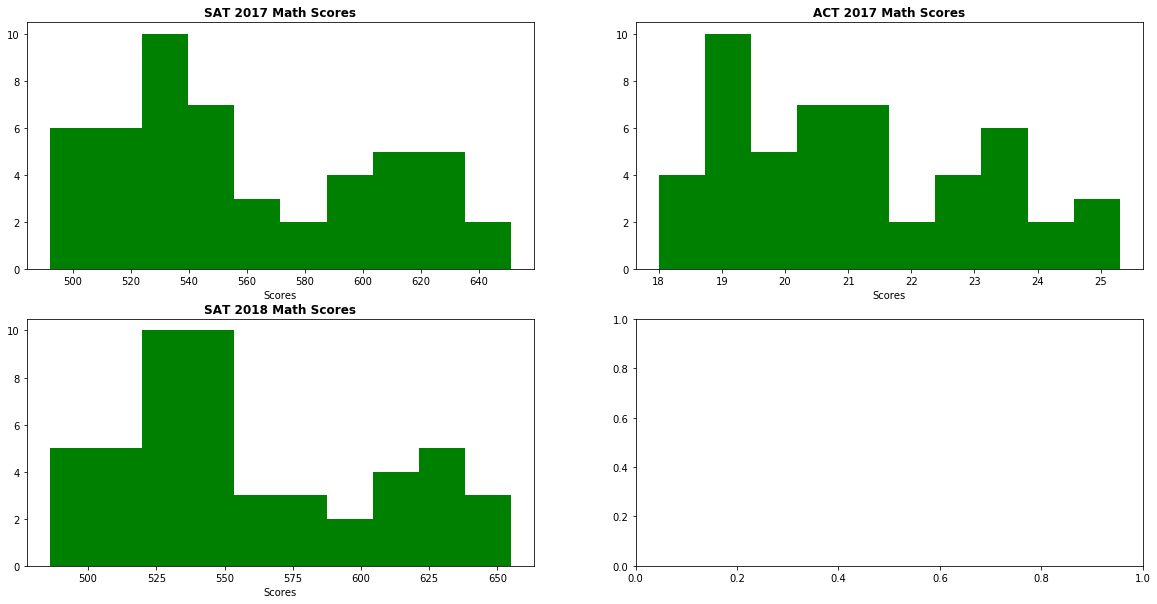

In [68]:
math_columns = ['sat17_math', 'act17_math', 'sat18_math']
math_titles = ['SAT 2017 Math Scores', 'ACT 2017 Math Scores', 'SAT 2018 Math Scores']
scores_xlabels = ['Scores' for i in range(4)]

subplot_histograms(scores, math_columns, math_titles, scores_xlabels[1:])

The distribution for math scores on all tests are right-skewed.
### Reading Score Distributions

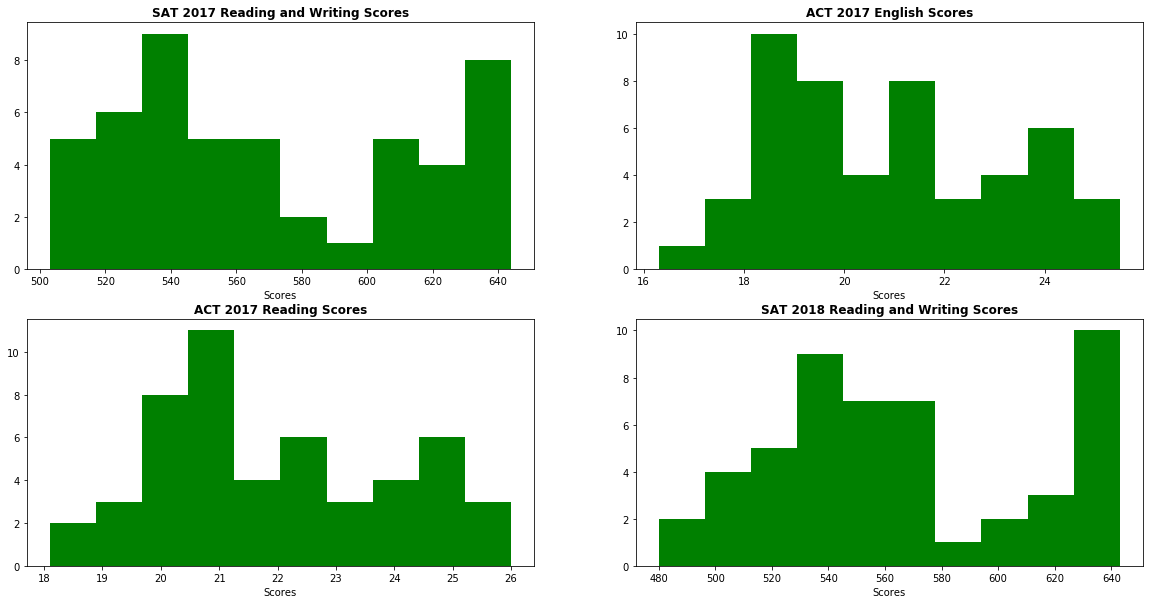

In [69]:
reading_columns = ['sat17_reading_and_writing', 'act17_english', 'act17_reading', 'sat18_reading_and_writing']
reading_titles = ['SAT 2017 Reading and Writing Scores', 'ACT 2017 English Scores', 'ACT 2017 Reading Scores', 'SAT 2018 Reading and Writing Scores']

subplot_histograms(scores, reading_columns, reading_titles, scores_xlabels)

The distributions for reading and verbal scores are fairly split with extremes being slightly more popular.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [70]:
def subplot_scatter(dataframe, col_x, col_y, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize = (10, 5)) # You'll want to specify your figsize
    ax.scatter(dataframe[col_x], dataframe[col_y], color = 'Red') # feel free to add more settings
    ax.set_title(title, fontweight = 'bold')
    ax.set_xlabel(xlabel) # Set titles, labels, etc here for each subplot
    ax.set_ylabel(ylabel)

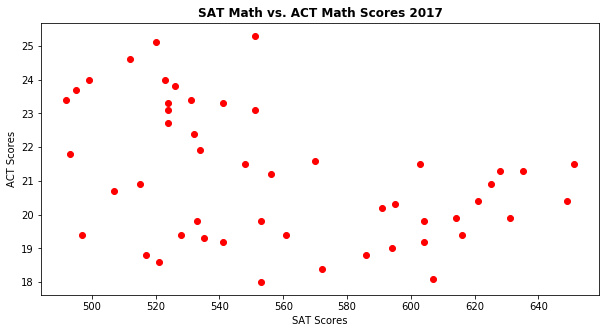

In [71]:
subplot_scatter(scores, 'sat17_math', 'act17_math', 'SAT Math vs. ACT Math Scores 2017', 'SAT Scores', 'ACT Scores')

It's a loose correlation, but it does seem that higher ACT math scores are associated with lower SAT math scores.

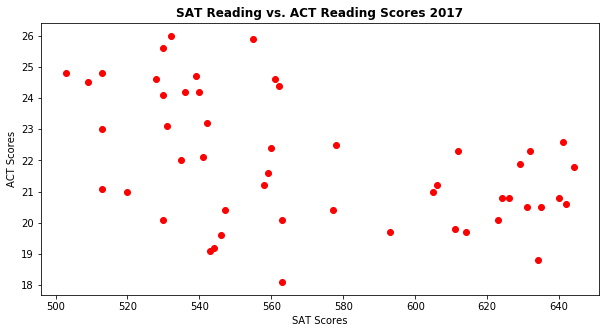

In [72]:
subplot_scatter(scores, 'sat17_reading_and_writing', 'act17_reading', 'SAT Reading vs. ACT Reading Scores 2017', 'SAT Scores', 'ACT Scores')

Higher ACT reading scores are lossely associated with lower SAT reading scores.

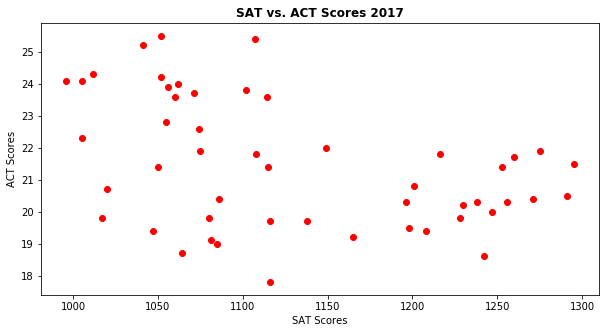

In [73]:
subplot_scatter(scores, 'sat17_composite', 'act17_composite', 'SAT vs. ACT Scores 2017', 'SAT Scores', 'ACT Scores')

Higher ACT composite scores are lossely associated with lower SAT composite scores.

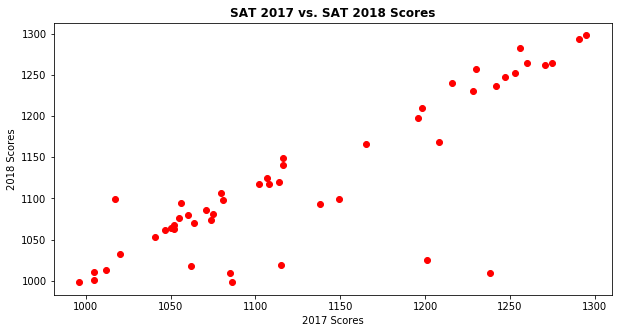

In [74]:
subplot_scatter(scores, 'sat17_composite', 'sat18_composite', 'SAT 2017 vs. SAT 2018 Scores', '2017 Scores', '2018 Scores')

There is a strong positive correlation between 2017 SAT scores and 2018 SAT scores.

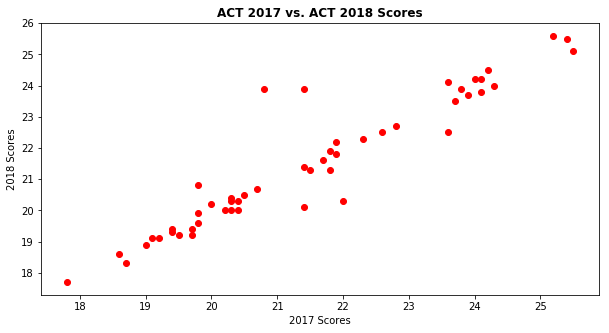

In [75]:
subplot_scatter(scores, 'act17_composite', 'act18_composite', 'ACT 2017 vs. ACT 2018 Scores', '2017 Scores', '2018 Scores')

There is a strong positive correlation between 2017 ACT scores and 2018 ACT scores.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [76]:
def subplot_boxplots(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (20, 10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(x = dataframe[column], ax = ax[i]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontweight = 'bold')
        ax[i].set_xlabel(list_of_xlabels[i]) # Set titles, labels, etc here for each subplot

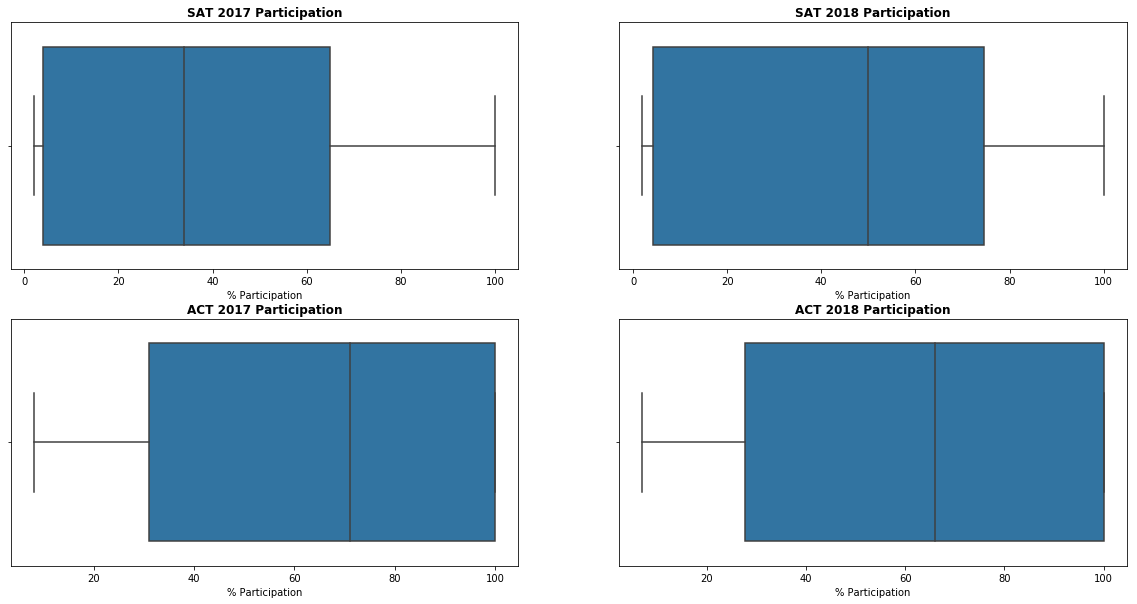

In [77]:
subplot_boxplots(scores, participation_columns, participation_titles, participation_xlabels)

There was slightly higher participation rates for the 2018 SAT compared to the 2017 SAT. The ACT did not change much.

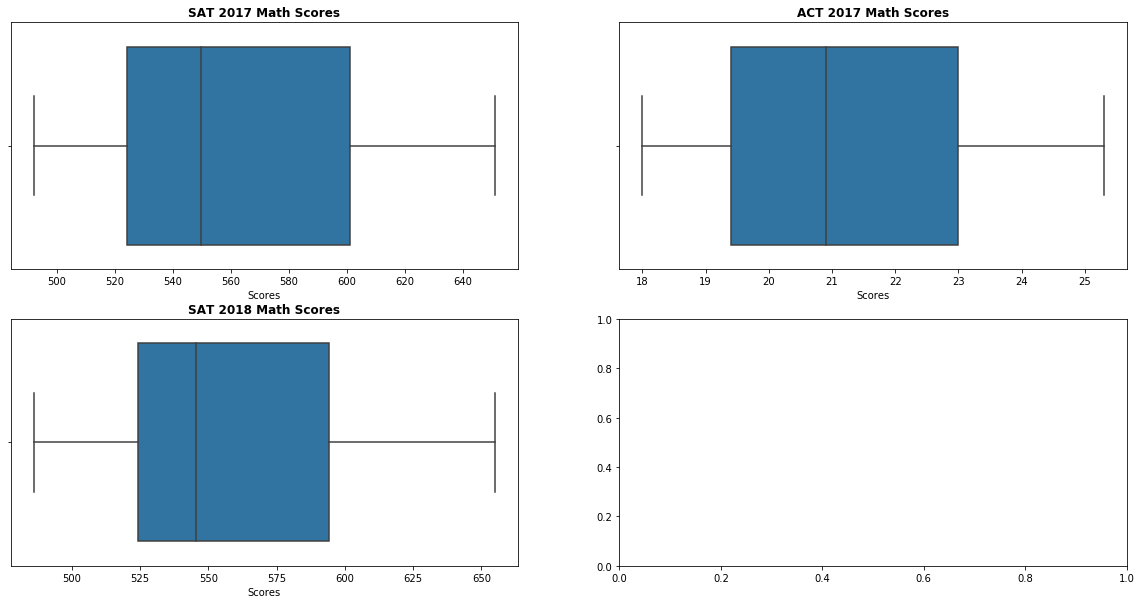

In [78]:
subplot_boxplots(scores, math_columns, math_titles, scores_xlabels[1:])

The distribution for math scores on all test are very similar. 

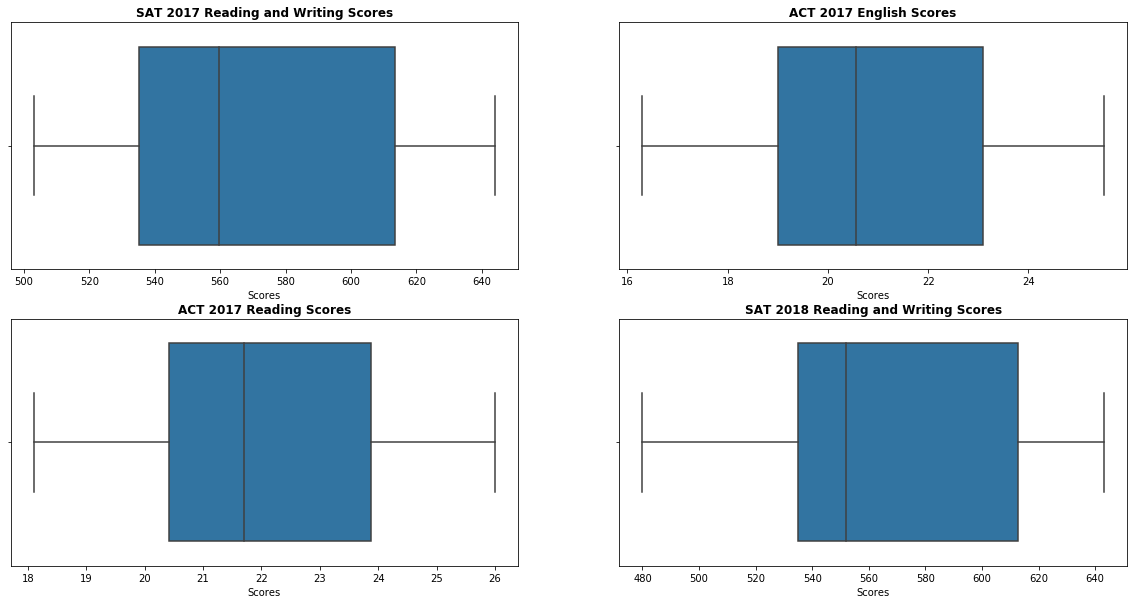

In [79]:
subplot_boxplots(scores, reading_columns, reading_titles, scores_xlabels)

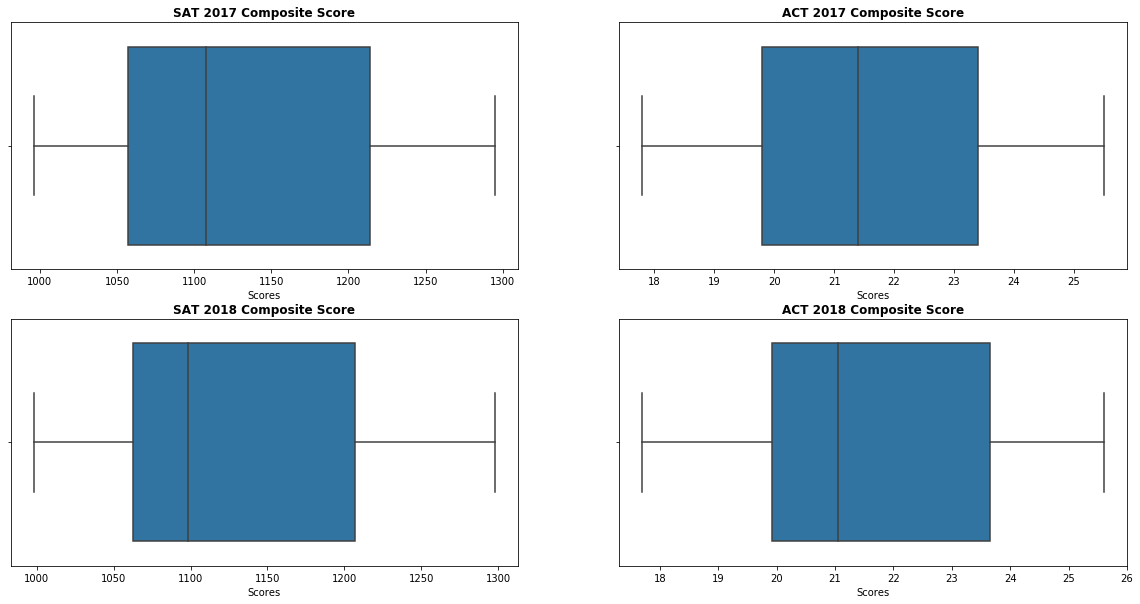

In [80]:
composite_columns = ['sat17_composite', 'act17_composite', 'sat18_composite', 'act18_composite']
composite_titles = ['SAT 2017 Composite Score', 'ACT 2017 Composite Score', 'SAT 2018 Composite Score', 'ACT 2018 Composite Score']

subplot_boxplots(scores, composite_columns, composite_titles, scores_xlabels)

It seems median scores dropped slightly overall from 2017 to 2018 on both tests.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

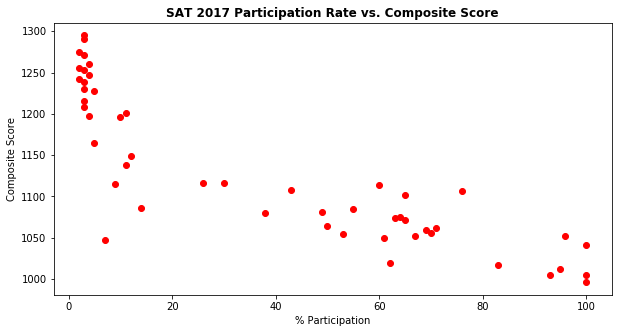

In [81]:
subplot_scatter(scores, 'sat17_participation', 'sat17_composite', 'SAT 2017 Participation Rate vs. Composite Score', '% Participation', 'Composite Score')

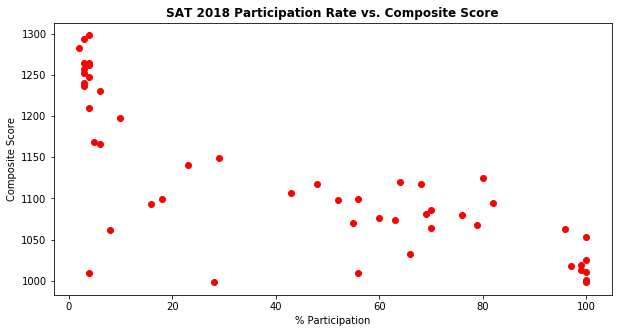

In [82]:
subplot_scatter(scores, 'sat18_participation', 'sat18_composite', 'SAT 2018 Participation Rate vs. Composite Score', '% Participation', 'Composite Score')

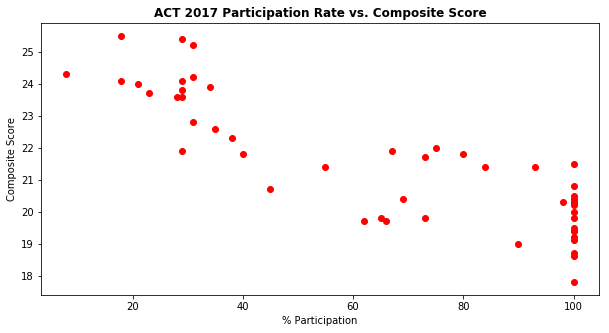

In [83]:
subplot_scatter(scores, 'act17_participation', 'act17_composite', 'ACT 2017 Participation Rate vs. Composite Score', '% Participation', 'Composite Score')

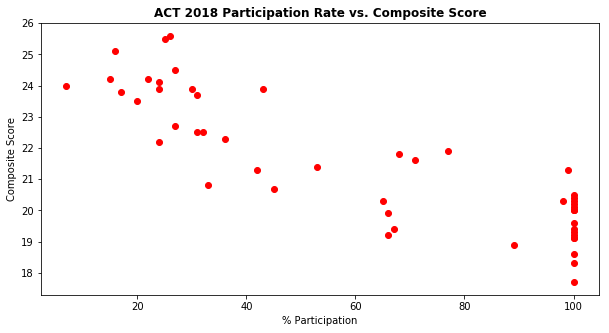

In [84]:
subplot_scatter(scores, 'act18_participation', 'act18_composite', 'ACT 2018 Participation Rate vs. Composite Score', '% Participation', 'Composite Score')

There is a fairly strong negative correlation between participation rate and composite score.

In [85]:
scores.loc[(scores['sat17_participation'] < 50) & (scores['act17_participation'] < 50), ['state', 'sat18_participation', 'act18_participation']]

,state,sat18_participation,act18_participation
36,Oregon,48.0,42.0


Oregon is the only state with lower than 50% participation for both standardized tests.

In [97]:
scores.loc[scores['state'].isin(['Ohio', 'Oklahoma']), ['state', 'sat17_participation', 'sat18_participation', 'act17_participation', 'act18_participation']]

,state,sat17_participation,sat18_participation,act17_participation,act18_participation
34,Ohio,12.0,18.0,75.0,100.0
35,Oklahoma,7.0,8.0,100.0,100.0


These states mandate a single college readiness exam (ACT or SAT), but both states still choose the ACT.

In [86]:
sat_free_states = ['Colorado', 'Connecticut', 'Delaware', 'Idaho', 'Illinois', 'Ohio', 'Oklahoma', 'Maine', 'Michigan', 'New Hampshire', 'New York', 'Rhode Island']
scores.loc[scores['state'].isin(sat_free_states), ['state', 'sat17_participation', 'sat18_participation']]

,state,sat17_participation,sat18_participation
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
11,Idaho,93.0,100.0
12,Illinois,9.0,99.0
18,Maine,95.0,99.0
21,Michigan,100.0,100.0
28,New Hampshire,96.0,96.0
31,New York,67.0,79.0
34,Ohio,12.0,18.0


States offering free SAT have high participation rates.
Source: https://www.collegeraptor.com/getting-in/articles/act-sat/states-act-sat-given-free/

In [87]:
scores.loc[scores['state'] == 'Utah', ['state', 'sat17_participation', 'sat18_participation']] #Getting values for bar chart

,state,sat17_participation,sat18_participation
43,Utah,3.0,4.0


In [88]:
scores['sat17_participation'].mean()

38.6

In [89]:
scores['sat18_participation'].mean()

44.82

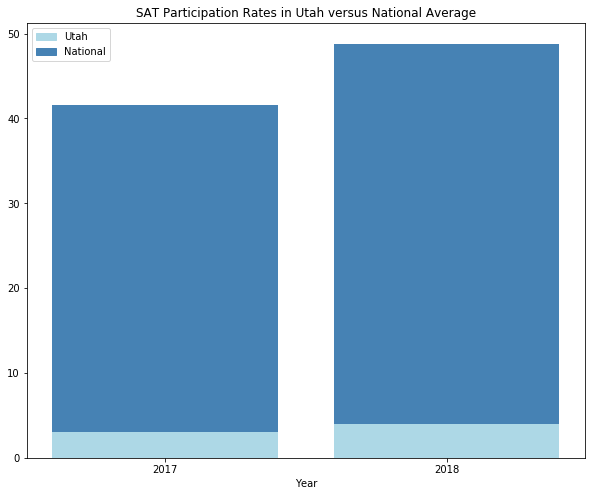

In [90]:
import matplotlib.patches as mpatches

ut_values = [3.0, 4.0] #Values for Utah
avg_values = [38.6, 44.82] #Values for national averages
bar_labels = ['2017', '2018'] #Labels for bar chart

r=[0,1] #Position of bars

plt.figure(figsize=(10,8))

plt.bar(r, ut_values, color = 'Lightblue') #Bar chart for Utah's values
plt.bar(r, avg_values, bottom = ut_values, color='Steelblue') #Bar chart for national averages

plt.title('SAT Participation Rates in Utah versus National Average') #Setting title
plt.xticks(r, bar_labels) #Setting group labels
plt.xlabel('Year') #Setting x label

light_blue_patch = mpatches.Patch(color='Lightblue', label='Utah') #Creating a patch for legend
steel_blue_patch = mpatches.Patch(color='Steelblue', label='National')
plt.legend(handles=[light_blue_patch, steel_blue_patch]) #Creating the legend

Utah has extremely low participation rates. <br/>
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html <br/>
https://matplotlib.org/tutorials/intermediate/legend_guide.html

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

### SAT 2018 Participation Rates by State
![](../images/sat18_participation_rates_map.png)
All states that offer the SAT for free or require the SAT have high SAT participation rates except for those that require students to choose between either test such as Ohio and Oklahoma.
### ACT 2018 Participation Rates by State
![](../images/act18_participation_rates_map.png)


## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:
#### Participation Rates:
Participation rates are right-skewed for the SAT and left-skewed for the ACT, meaning there are more states with higher participation on the ACT and more states with lower participation on the SAT. 
#### Math Scores:
Math scores on both the SAT and ACT are right-skewed, meaning there are a few who do really well, but most fall below average. 
#### Reading Scores:
Reading scores on both the SAT and ACT tend to favor the extremes, where students either do really well or poorly. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No. Most of the distributions are not normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: None of these distributions follow a normal distribution.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: It does not make sense because we are working with the population. Statistical inference is used when making assumptions from a sample to draw a conclusion about its population, but we already have the data for the entire population. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

It is innapropriate to compare SAT and ACT math scores directly because they have different scales.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

### Colorado
Source: https://www.testive.com/colorado-sat-change-2017/ <br/>
Source: https://www.chicagotribune.com/news/breaking/ct-iillinois-act-exam-met-20170414-story.html <br/>
According to this cite, Colorado started mandating the SAT for juniors in high school in the 2016/2017 school year. This explains why the participation rate increased so much for seniors in 2018. These were the juniors who were required to take the SAT the previous year as juniors. This implies that familiarity and social norms have an impact on participation rates. The same is true for Illinois, as their 15 year contract with the ACT company expired and College Board won the bidding for the new contract.

In [91]:
scores.loc[scores['state'] == 'Colorado', ['state', 'sat17_participation', 'sat18_participation']]

,state,sat17_participation,sat18_participation
5,Colorado,11.0,100.0


### Rhode Island
Source: https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores <br/>
Source: https://magoosh.com/hs/sat/2017/states-provide-sat-free/ <br/>
In 2018, the SAT became a graduation requirement in Rhode Island. Rhode Island is also one of 10 states that offer the SAT for free to students, which has lead to an increase in participation rates. 

In [92]:
scores.loc[scores['state'] == 'Rhode Island', ['state', 'sat17_participation', 'sat18_participation']]

,state,sat17_participation,sat18_participation
38,Rhode Island,71.0,97.0


### Ohio
Source: https://www.cleveland.com/metro/2017/04/free_sat_or_act_exams_give_all.html <br/>
Source: https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors <br/>
In 2014, Ohio mandates all juniors to take either the ACT or SAT. Since traditionally Ohio school districts favor the ACT, participation for the SAT did not increase much.

In [93]:
scores.loc[scores['state'] == 'Ohio', ['state', 'sat17_participation', 'sat18_participation']]

,state,sat17_participation,sat18_participation
34,Ohio,12.0,18.0


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### SAT Participation in Utah
#### Lots of Opportunity in the Midwest
The midwest has low SAT participation and high ACT participation for both 2017 and 2018. This means that there is a lot of opportunity to increase SAT participation. Colorado and Illinois has lead the way with about 90% increase in participation from 2017 to 2018. This is due to mandating the SAT for all juniors starting in the 2016/2017 school year. The state also offers the test for free. This allows for students with low income backgrounds to take the SAT, and has clearly led to an increase in participation. I recommend the State of Utah to follow this trend and mandate the SAT for all juniors and provide it for free.